# Process a scan

In [19]:
from pathlib import Path
from nevernegative.layers.utils.resize import Resize
from nevernegative.scanner.simple import SimpleScanner
import matplotlib.pyplot as plt

## Location

In [27]:
drive = Path.home() / "Library/CloudStorage/GoogleDrive-louis.manestar@gmail.com/My Drive/"
scan_version = "v1"
folder_name = "25-02 Home:Hitchin:Party Nikon Portra 800"
glob = "*.NEF"

folder_path = drive / "Film Photos" / folder_name
images_path = folder_path / "scans" / scan_version
output_path = folder_path / "nevernegative" / scan_version

## Layers

### From Preset

In [33]:
from nevernegative.films.ilford import Delta3200, HP5Plus
from nevernegative.films.kodak import ColorPlus, Gold, Ektar

layers = ColorPlus(temperature=6000).layers

### Remove pigment

In [ ]:
from nevernegative.layers.balancing.brightness import Brightness
from nevernegative.layers.balancing.contrast import Contrast
from nevernegative.layers.balancing.grey import Grey
from nevernegative.layers.balancing.pigment import RemoveEmulsionPigment
from nevernegative.layers.balancing.temperature import Temperature
from nevernegative.layers.balancing.invert import Invert
from nevernegative.layers.utils.clip import Clip

layers = [
    Temperature(temperature=6000),
    RemoveEmulsionPigment(pigment=(187, 187, 196)),
    Invert(),
    Grey(channel=2),
    Clip(),
]

## Process

#### Single Image

(np.float64(-0.5), np.float64(265.5), np.float64(399.5), np.float64(-0.5))

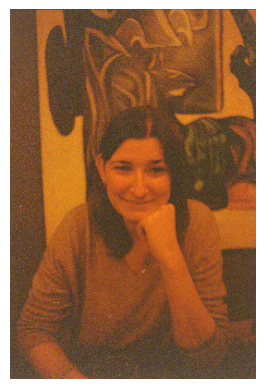

In [34]:
scanner = SimpleScanner([Resize(height=400), *layers], device="mps")

filename = "DSC_2720.NEF"

processed = scanner.file(
    source=images_path / filename,
    destination=output_path / "single_image",
    is_raw=True,
    plot_path="image_location"
)

plt.imshow(processed.permute(1, 2, 0).cpu().numpy(), cmap="gray")
plt.axis("off")

### Batch

In [35]:
scanner = SimpleScanner(layers, device="mps")

scanner.glob(
    source=(images_path / glob).as_posix(),
    destination=output_path,
    is_raw=True,
)

Proccesing images: 100%|██████████| 38/38 [04:03<00:00,  6.40s/it]
